In [13]:
import skprocrustes as skp
import matplotlib.pyplot as plt
import numpy as np
import time
import scipy.linalg as sp

In [14]:
%matplotlib inline

In [15]:
p = skp.ProcrustesProblem((5000,5000,10,10), problemnumber=1)

In [34]:
A = np.diag(2*np.ones((5000,))) + np.diag(-1*np.ones((4999,)), k = 1) + np.diag(-1*np.ones((4999,)), k = -1)
B = np.dot(A, np.eye(5000,10))

In [35]:
p2 = skp.ProcrustesProblem((5000,5000,10,10), matrices = (A, B, np.eye(10,10)))

In [36]:
gkbsolver = skp.GKBSolver(inner_solver="spg", verbose=0)
t0 = time.time(); results_gkb = gkbsolver.solve(p2); cpu_gkb = time.time()-t0;
gbbsolver = skp.GKBSolver(inner_solver="gbb", halfreorth=True, verbose=0)
t0 = time.time(); results_gbb = gbbsolver.solve(p2); cpu_gkbgbb = time.time()-t0;
puregbbsolver = skp.GBBSolver(verbose=0)
t0 = time.time(); results_puregbb = puregbbsolver.solve(p2); cpu_puregbb = time.time()-t0;
spgsolver = skp.SPGSolver(verbose=0)
t0 = time.time(); results_spg = spgsolver.solve(p2); cpu_spg = time.time()-t0;

# Resumo

Text(0.5, 1.0, 'Problem 1')

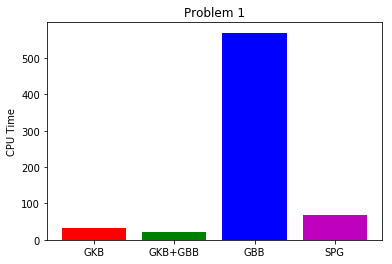

In [37]:
gkb, gbb, puregbb, spg = plt.bar([0,1,2,3], [cpu_gkb, cpu_gkbgbb, cpu_puregbb, cpu_spg])
gkb.set_facecolor('r')
gbb.set_facecolor('g')
puregbb.set_facecolor('b')
spg.set_facecolor('m')
ax = plt.gca()
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['GKB', 'GKB+GBB', 'GBB', 'SPG'])
#ax.set_ylim([0, 100])
ax.set_ylabel('CPU Time')
ax.set_title('Problem 1')

In [ ]:
np.linalg.cond(p.A)